# Hypothesis Testing - One-Sample Proportion Test

### Objective
The purpose of this work is to conduct a one-sample proportion test to analyze model data. The objective is to understand and apply the methodology of the one-sample proportion test, assessing whether the observed proportion of successes in a sample significantly differs from a specified population proportion. This analysis aims to provide insights into the significance of the observed proportion and to understand the impact of sample size and significance level on the test outcomes.

## 1. Formulation of Null and Alternative Hypotheses:
For this case study, the null hypothesis (H₀) states that the population proportion is equal to a specified value, while the alternative hypothesis (H₁) states that the population proportion is not equal to the specified value.

**Null Hypothesis (H₀):** The population proportion is equal to a specified value, $\mathbb{P}$(```population_proprtion```).

**Alternative Hypothesis (H₁):** The population proportion is not equal to $\mathbb{P}$(```population_proportion```).

## 2. Comparison Table:
The following table compares the results obtained from the one-sample proportion test for different sample sizes and significance levels (α):

#### α = 0.05:
|  N   | Z-statistic | Non-rejection Region | P-value | Decision              |
|:----:|:-----------:|:--------------------:|:-------:|:---------------------:|
|  30  |     -1.10    |      (-1.96, 1.96)   |  0.273  | Fail to Reject H₀    |
|  50  |     -0.85    |      (-1.96, 1.96)   |  0.396  | Fail to Reject H₀    |
| 200  |      0.28    |      (-1.96, 1.96)   |  0.777  | Fail to Reject H₀    |

#### α = 0.1:
|  N   | Z-statistic | Non-rejection Region | P-value | Decision              |
|:----:|:-----------:|:--------------------:|:-------:|:---------------------:|
|  30  |     -1.10    |      (-1.64, 1.64)   |  0.273  | Fail to Reject H₀    |
|  50  |     -0.85    |      (-1.64, 1.64)   |  0.396  | Fail to Reject H₀    |
| 200  |      0.28    |      (-1.64, 1.64)   |  0.777  | Fail to Reject H₀    |


## 3. Brief Conclusions:
Based on the results of the one-sample proportion test, decisions were made regarding the null hypothesis. The decision to reject or fail to reject the null hypothesis depends on comparing the calculated test statistic (Z-statistic) with the critical value or the p-value with the significance level (alpha). 

- **Impact of Sample Size:** The sample size affects the outcome of the test. As the sample size increases, the test becomes more sensitive to differences between the sample proportion and the population proportion.
  
- **Impact of Significance Level:** The significance level determines the threshold for rejecting the null hypothesis. A lower significance level leads to a stricter criterion for rejecting the null hypothesis, whereas a higher significance level increases the likelihood of rejecting the null hypothesis.

In conclusion, the one-sample proportion test provides a statistical framework for making decisions based on sample data. By considering the sample size and significance level, researchers can assess the significance of observed proportions and draw meaningful conclusions about the population proportion of interest.

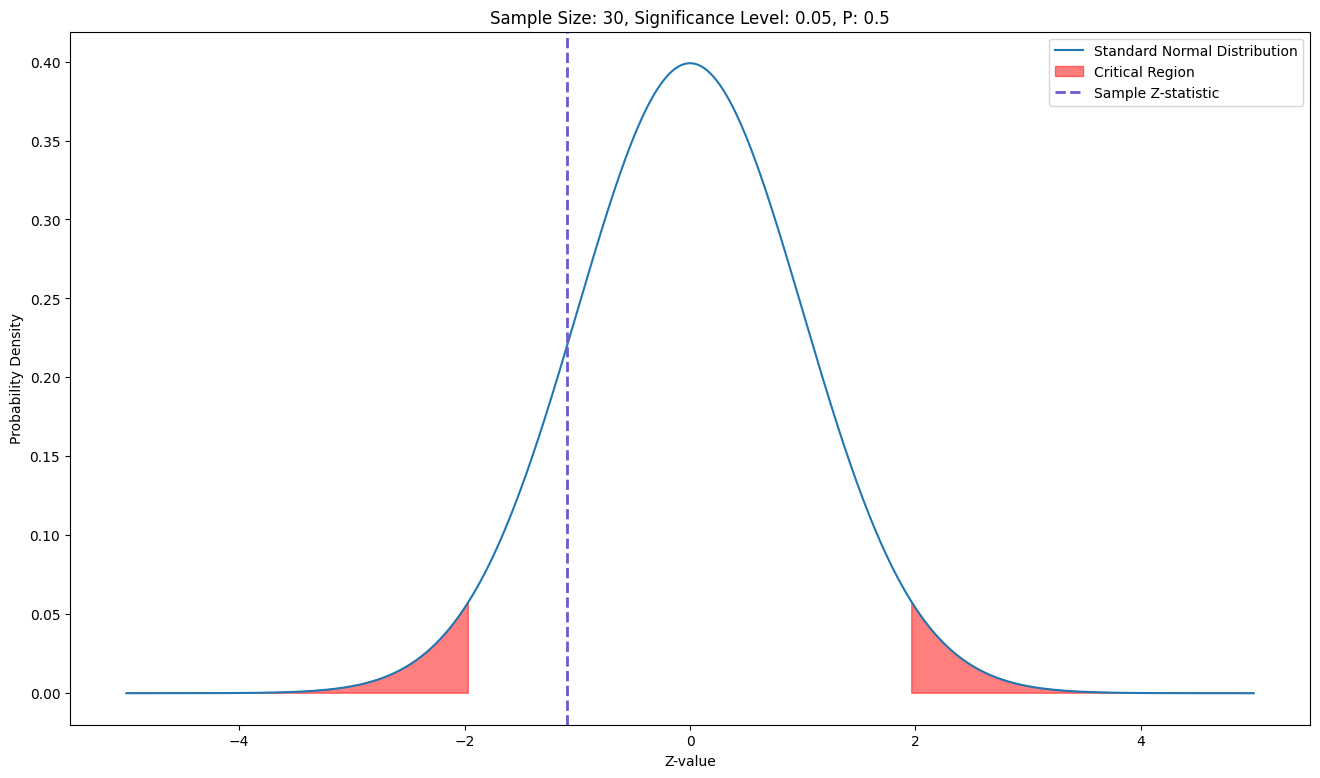

Z-statistic: -1.0954451150103321
Critical Value: (-1.959963984540054, 1.959963984540054)
P-value: 0.27332167829229803
Decision: Fail to Reject Null Hypothesis 







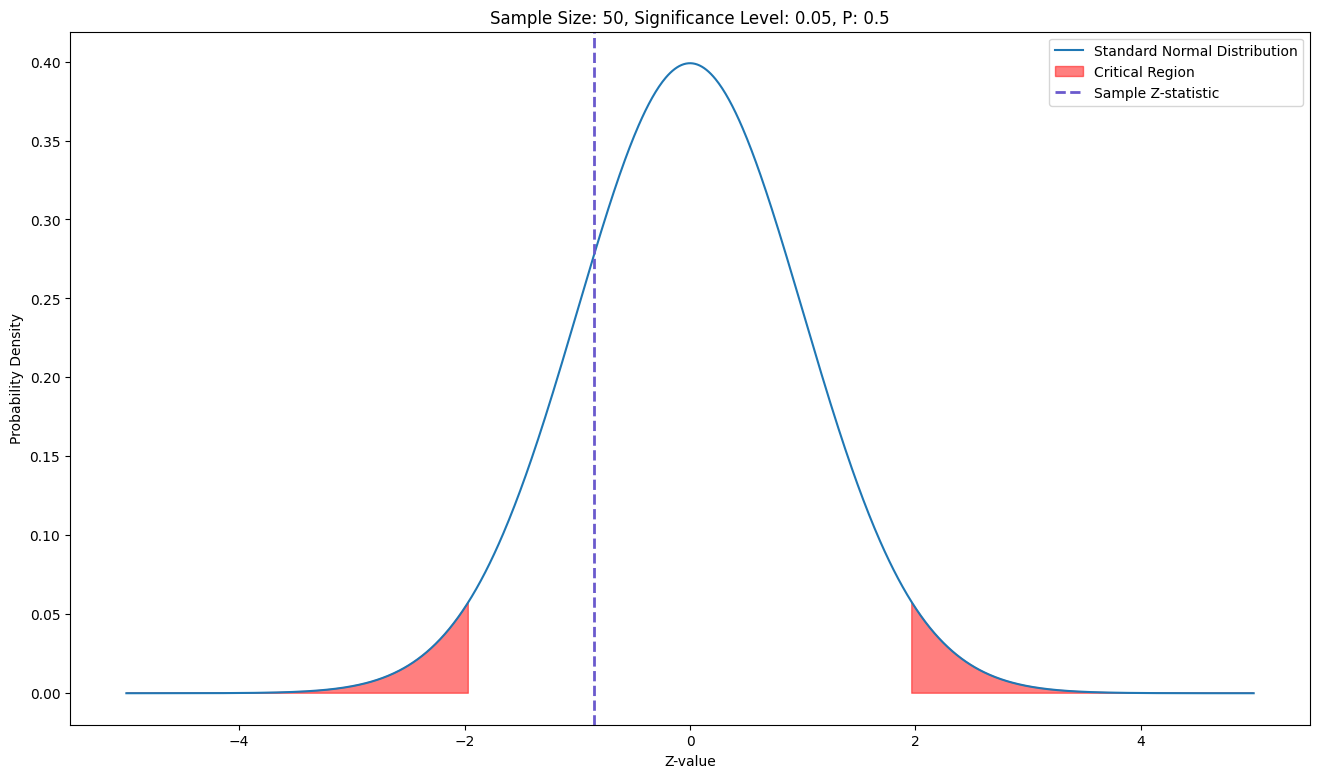

Z-statistic: -0.848528137423857
Critical Value: (-1.959963984540054, 1.959963984540054)
P-value: 0.396143909152074
Decision: Fail to Reject Null Hypothesis 







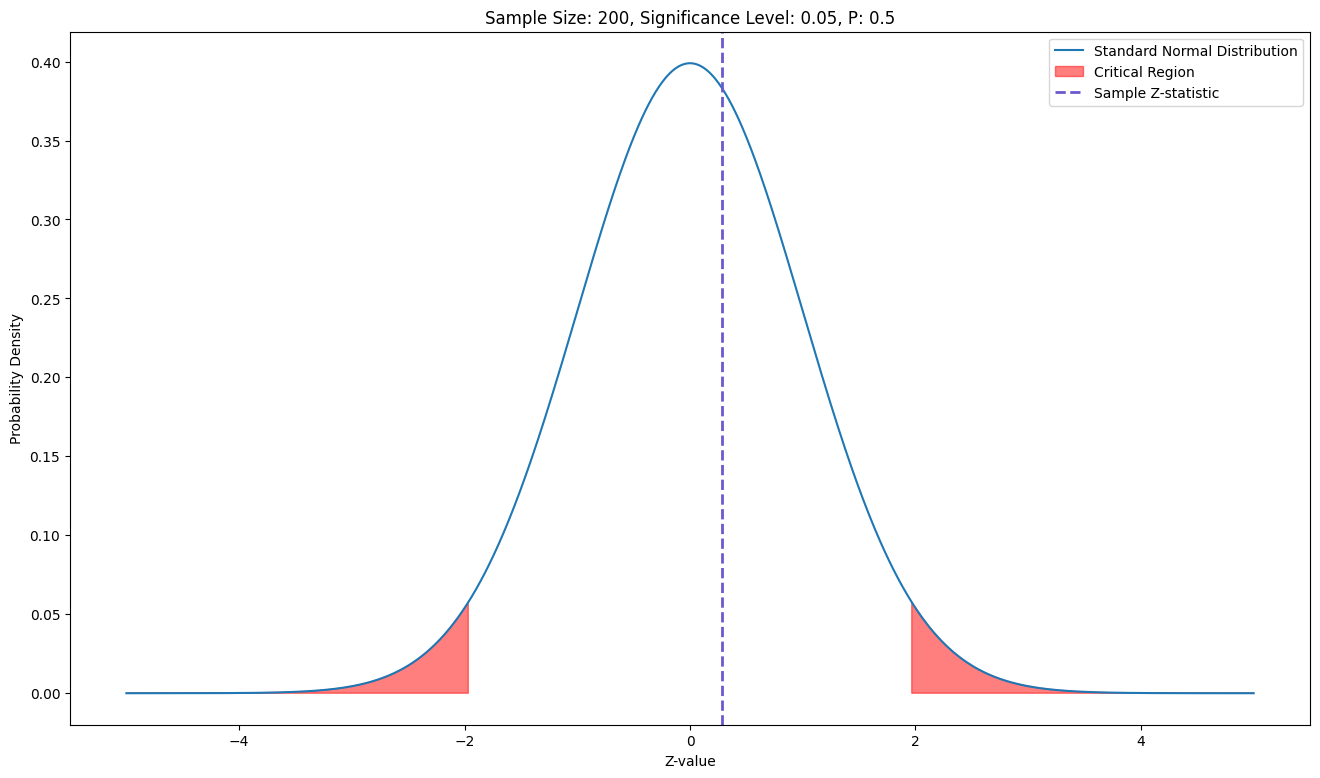

Z-statistic: 0.2828427124746193
Critical Value: (-1.959963984540054, 1.959963984540054)
P-value: 0.7772974107895214
Decision: Fail to Reject Null Hypothesis 







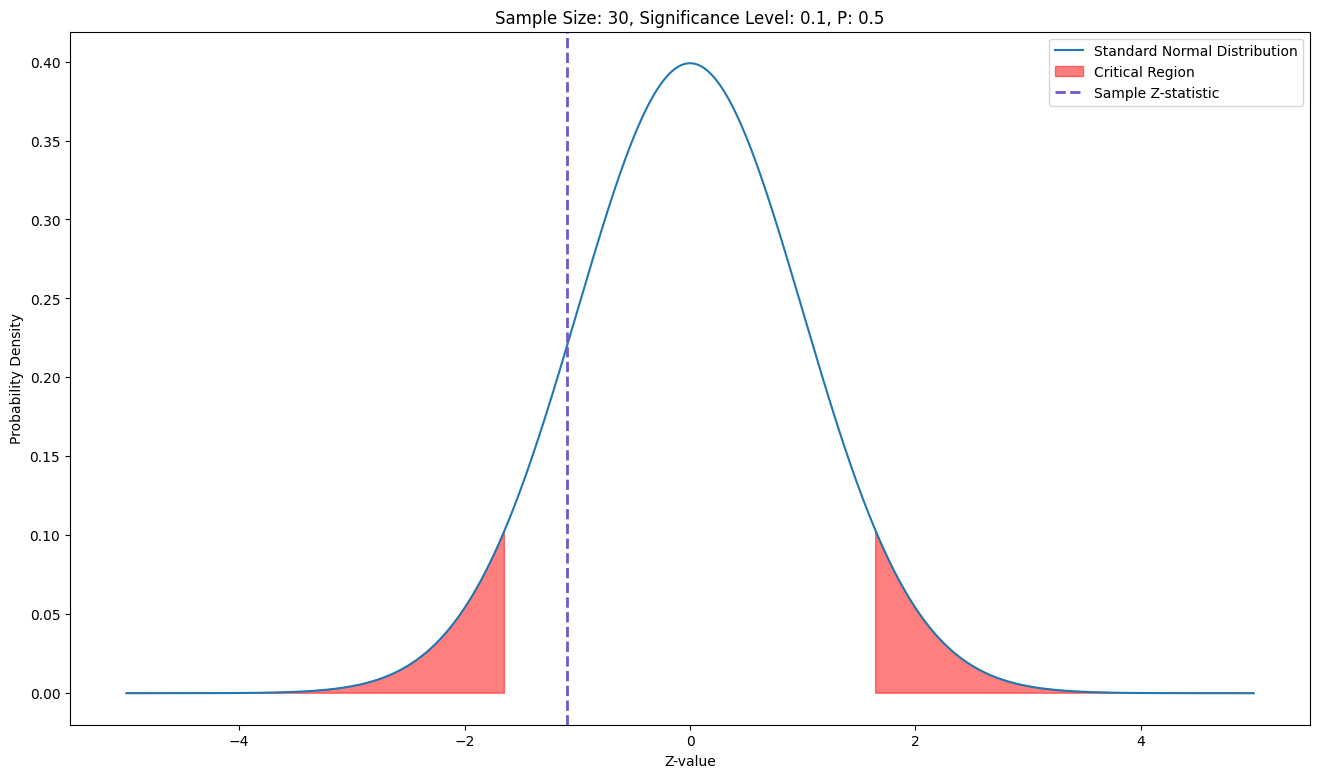

Z-statistic: -1.0954451150103321
Critical Value: (-1.6448536269514722, 1.6448536269514722)
P-value: 0.27332167829229803
Decision: Fail to Reject Null Hypothesis 







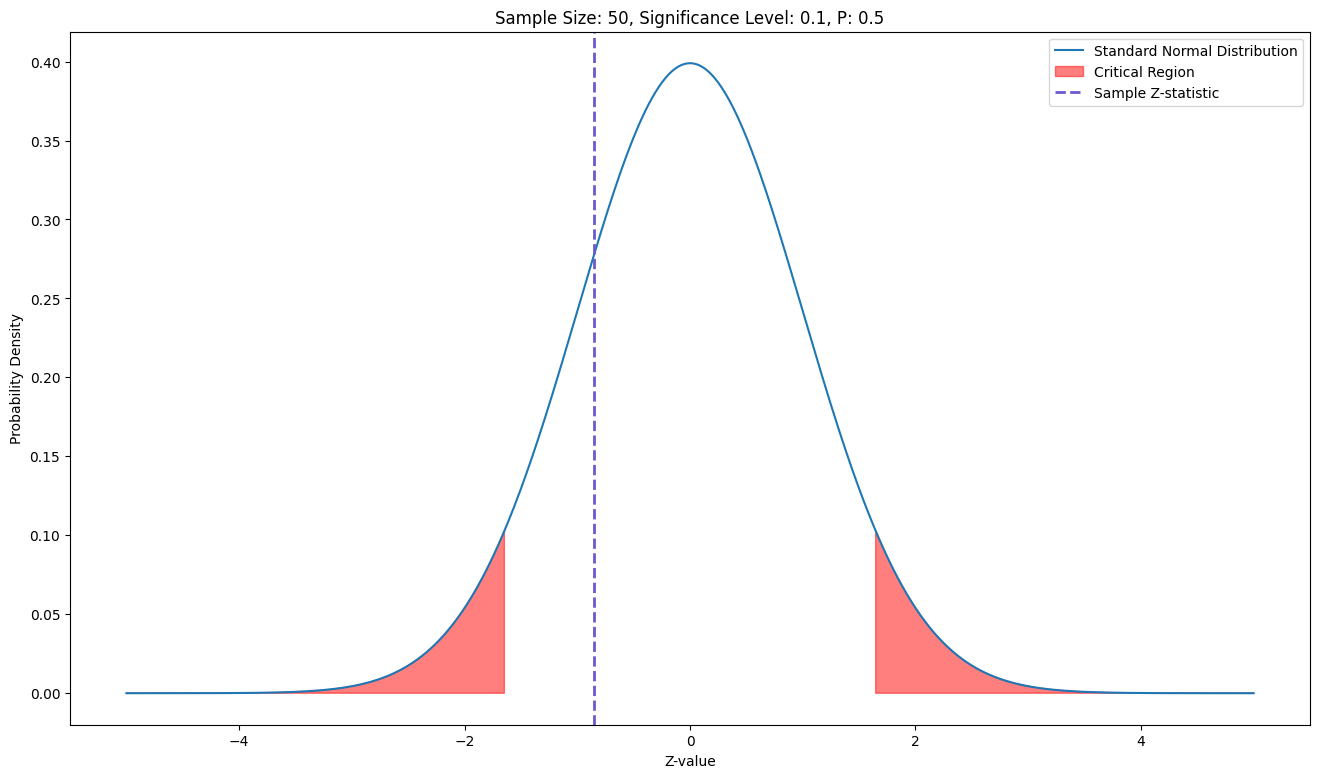

Z-statistic: -0.848528137423857
Critical Value: (-1.6448536269514722, 1.6448536269514722)
P-value: 0.396143909152074
Decision: Fail to Reject Null Hypothesis 







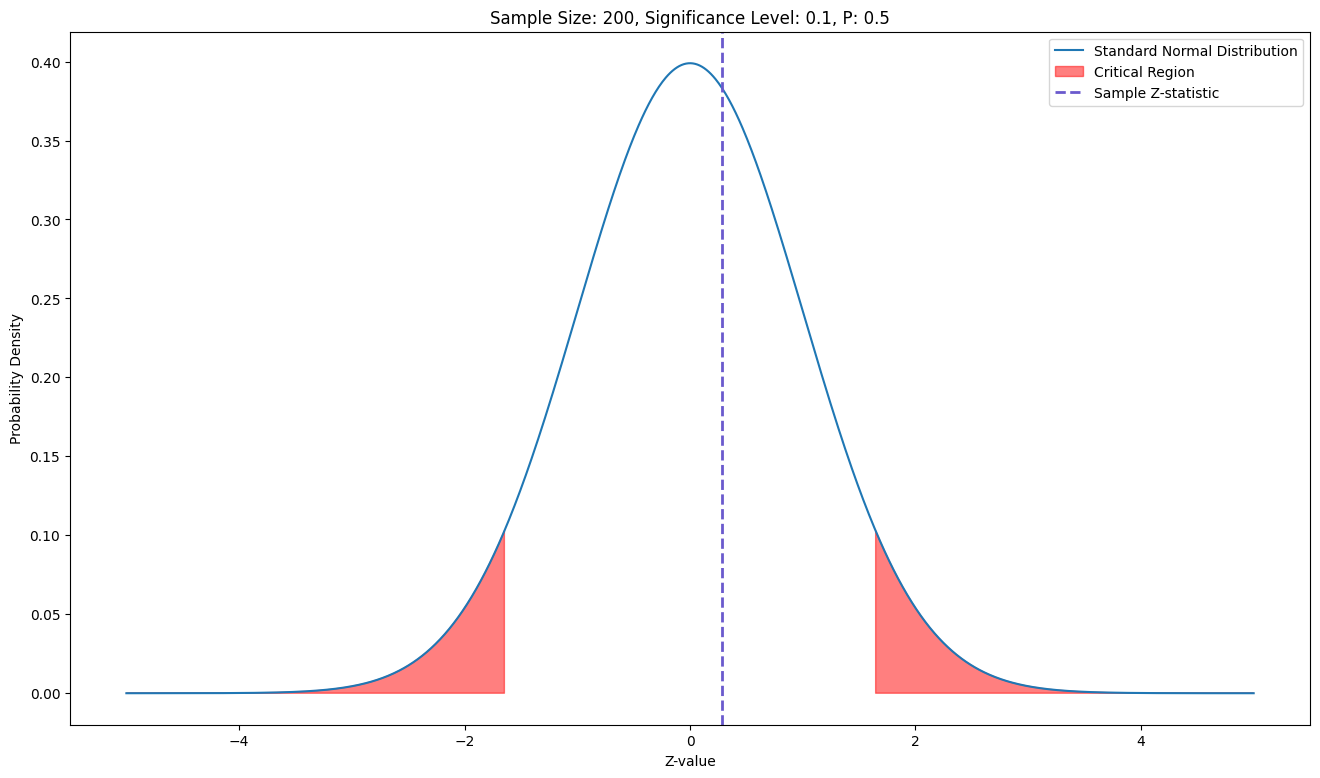

Z-statistic: 0.2828427124746193
Critical Value: (-1.6448536269514722, 1.6448536269514722)
P-value: 0.7772974107895214
Decision: Fail to Reject Null Hypothesis 







In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def one_sample_proportion_test(sample_size, population_proportion, alpha):
    np.random.seed(10)

    # Generate data, count the number of successes
    random_sample = np.random.uniform(0, 1, sample_size)
    successes = np.sum(random_sample < population_proportion)

    # Calculate Sample Proportion
    sample_proportion = successes / sample_size
    
    # Compute the Standard Error (SE)
    SE = np.sqrt((population_proportion * (1 - population_proportion)) / sample_size)
    
    # Compute the Test Statistic (Z-score)
    Z = (sample_proportion - population_proportion) / SE
    
    # Critical Values, Critical Region and P-value
    critical_value = norm.ppf(1 - alpha / 2)  # For two-tailed test
    critical_region = (-critical_value, critical_value)
    p_value = 2 * (1 - norm.cdf(abs(Z)))      # For two-tailed test
    
    # Make a Decision
    if abs(Z) > critical_value or p_value < alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"

    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    plt.figure(figsize=(16, 9))    
    plt.plot(x, y, label='Standard Normal Distribution')
    plt.fill_between(x, 0, y, where=(x < -critical_value) | (x > critical_value), color='red', alpha=0.5,
                     label='Critical Region')
    plt.axvline(Z, color='slateblue', linestyle='dashed', linewidth=2, label='Sample Z-statistic')
    plt.legend()
    plt.title(f'Sample Size: {sample_size}, Significance Level: {alpha}, P: {population_proportion}')
    plt.xlabel('Z-value')
    plt.ylabel('Probability Density')
    plt.show()
    
    print("Z-statistic:", Z)
    print("Critical Value:", critical_region)
    print("P-value:", p_value)
    print("Decision:", decision, "\n\n\n\n\n")

one_sample_proportion_test(30, 0.5, 0.05)
one_sample_proportion_test(50, 0.5, 0.05)
one_sample_proportion_test(200, 0.5, 0.05)
one_sample_proportion_test(30, 0.5, 0.1)
one_sample_proportion_test(50, 0.5, 0.1)
one_sample_proportion_test(200, 0.5, 0.1)